# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier


In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/ycwang15/PGP_DSBA/Data/EasyVisa.csv")

In [4]:
df_copy=df.copy()

## Data Overview

- Observations
- Sanity checks

### The first and the last 5 rows of the data

In [5]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### The shape of the data

In [7]:
df.shape

(25480, 12)

### Check the missing value and the duplicate value

In [8]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* No missing value

In [9]:
df.duplicated().sum()

0

* No duplicated value in this dataset

### Check the feature of each column of the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Check the statistical summary of the data

In [11]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


* We can notice that for some companies, the number of employees in the employer's company is negative, we need to change this problem.
* So let's foucs on the column "no_of_employees".

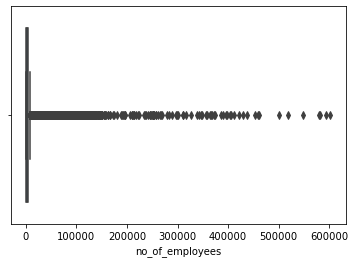

In [12]:
sns.boxplot(data=df,x="no_of_employees");

<AxesSubplot:xlabel='no_of_employees', ylabel='Count'>

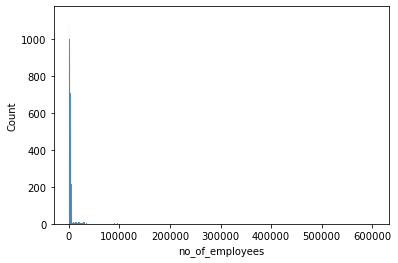

In [13]:
sns.histplot(data=df,x="no_of_employees")

* We can noticed that there are so many outliers in the column "no_of_employees", it's hard to use mode or median to replace the negative number, so here I will assume that a staff member accidentally entered a negative number that should have been a positive number.
* I will just change these negative number into positive number.

In [14]:
df.loc[df["no_of_employees"]<0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [15]:
df["no_of_employees"]=df["no_of_employees"].abs()

* Let's check it again.

In [16]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.089207,1979.409929,74455.814592
std,22877.917453,42.366929,52815.942327
min,11.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


* There's no negative number in the column "no_of_employees"

### Now, let's check the category column

In [17]:
category_col = list(df.select_dtypes("object").columns)
for i in category_col:
    print(df[i].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

### Due to the feature of the column case_id, we will drop this column.

In [18]:
df.drop(["case_id"], axis=1, inplace=True)

### Let's check the data one more time

In [19]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [20]:
df.shape

(25480, 11)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


In [22]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.089207,1979.409929,74455.814592
std,22877.917453,42.366929,52815.942327
min,11.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


* Now everything looks good.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

* Question1: Does education play a role in Visa certification?

<AxesSubplot:xlabel='education_of_employee', ylabel='count'>

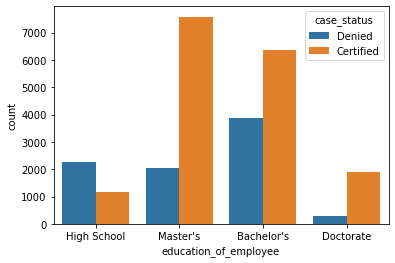

In [23]:
sns.countplot(data=df,x="education_of_employee",hue="case_status")

* Education plays an important role here, the higher the degree, the lower the chance of an applicant being rejected, and the number of applicants for master's and bachelor's degrees is far greater than the number of applicants with only a high school degree.

* Question2: How does the visa status vary across different continents?

<AxesSubplot:xlabel='continent', ylabel='count'>

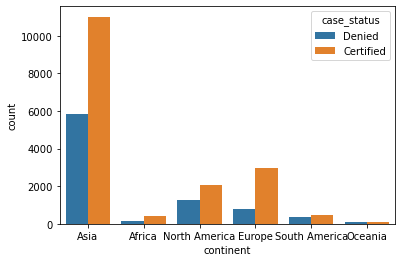

In [24]:
sns.countplot(data=df,x="continent",hue="case_status")

* Asia has the highest total number of applicants, but the rejection rate is also high. European applicants had the lowest percentage of rejections of any continent, although the total number of European applicants was not the highest.

* Question3: Does work experience influence visa status?

<AxesSubplot:xlabel='has_job_experience', ylabel='count'>

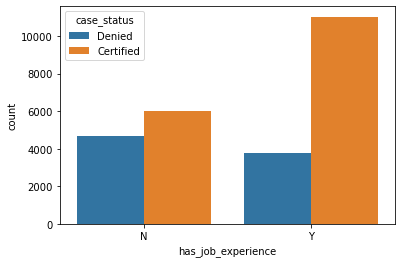

In [25]:
sns.countplot(data=df,x="has_job_experience",hue="case_status")

* The total number of applicants with work experience is significantly higher than the number of applicants without work experience, while the proportion of applicants with work experience getting visas is higher.

* Question4: Which pay unit is most likely to be certified for a visa?

<AxesSubplot:xlabel='unit_of_wage', ylabel='count'>

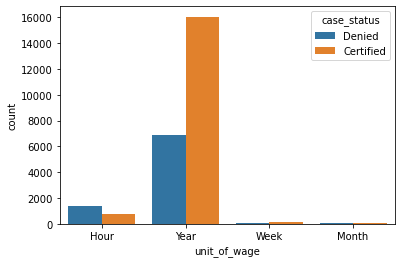

In [26]:
sns.countplot(data=df,x="unit_of_wage",hue="case_status")

* Year pay unit is most likely to be certified.

* Question5: How does the visa status change with the prevailing wage?

<AxesSubplot:xlabel='prevailing_wage', ylabel='Count'>

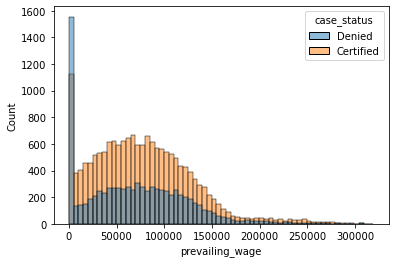

In [27]:
sns.histplot(df,x="prevailing_wage",hue="case_status")

* The prevailing_wage does not play a significant role in obtaining a visa, the rate of obtaining a visa is almost the same regardless of the prevailing_wage.

### Now let's do EDA for other variables

* Correlation check

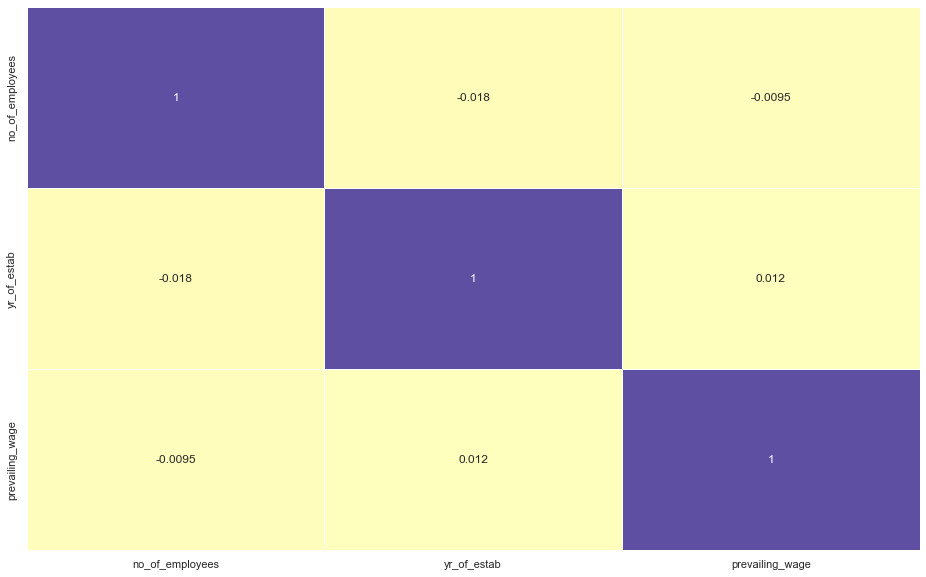

In [28]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")
plt.show()

* There is no obvious correlation between the variables

In [29]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<AxesSubplot:xlabel='no_of_employees', ylabel='Count'>

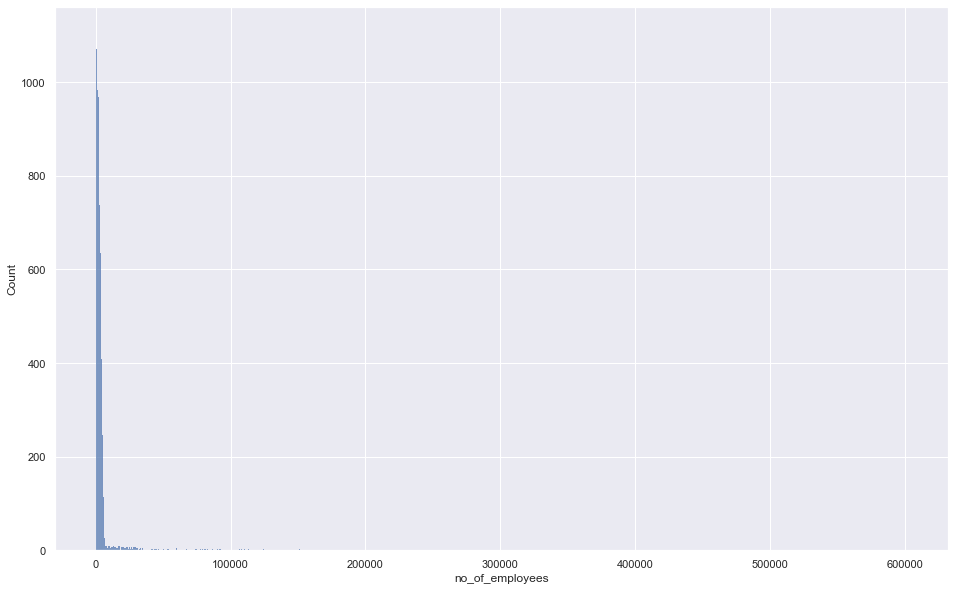

In [30]:
sns.histplot(data=df, x="no_of_employees")

* Most companies have employees number less than 10,000.

<AxesSubplot:xlabel='prevailing_wage', ylabel='Count'>

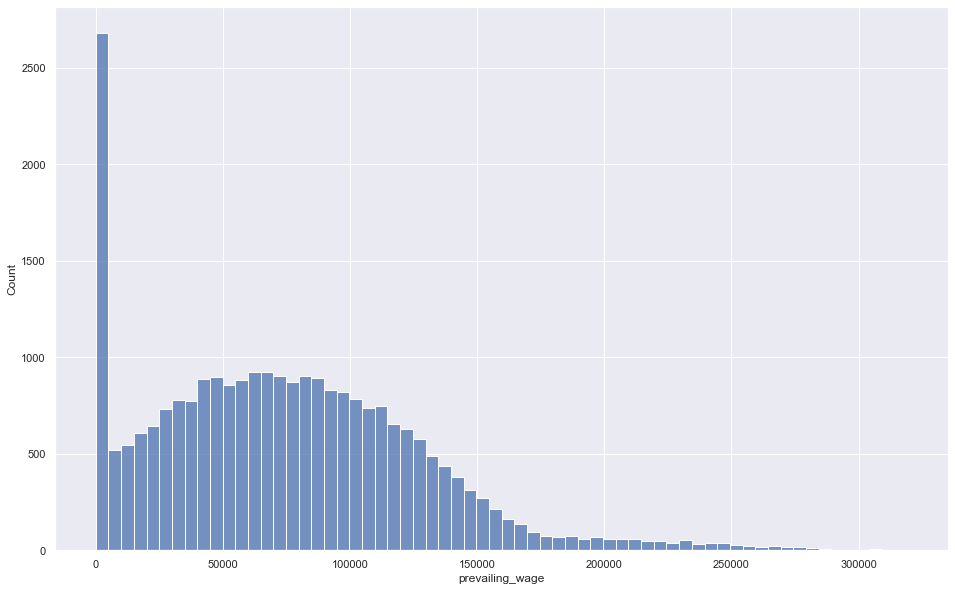

In [31]:
sns.histplot(data=df, x="prevailing_wage")

* Most wage is between 50,000 ti 150,000.

<AxesSubplot:xlabel='continent', ylabel='count'>

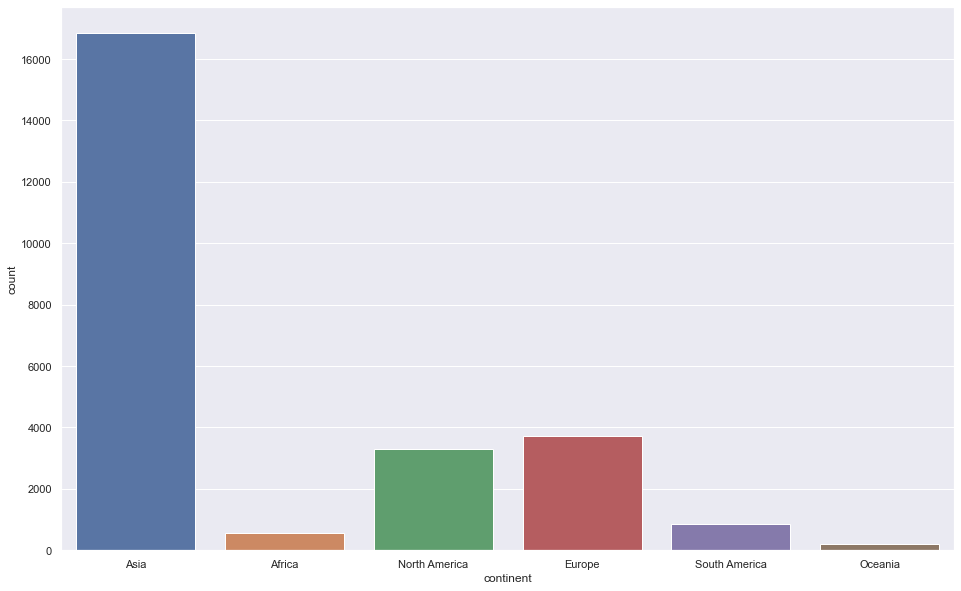

In [32]:
sns.countplot(data=df, x="continent")

* Most foreign employees come from Asia.

<AxesSubplot:xlabel='education_of_employee', ylabel='count'>

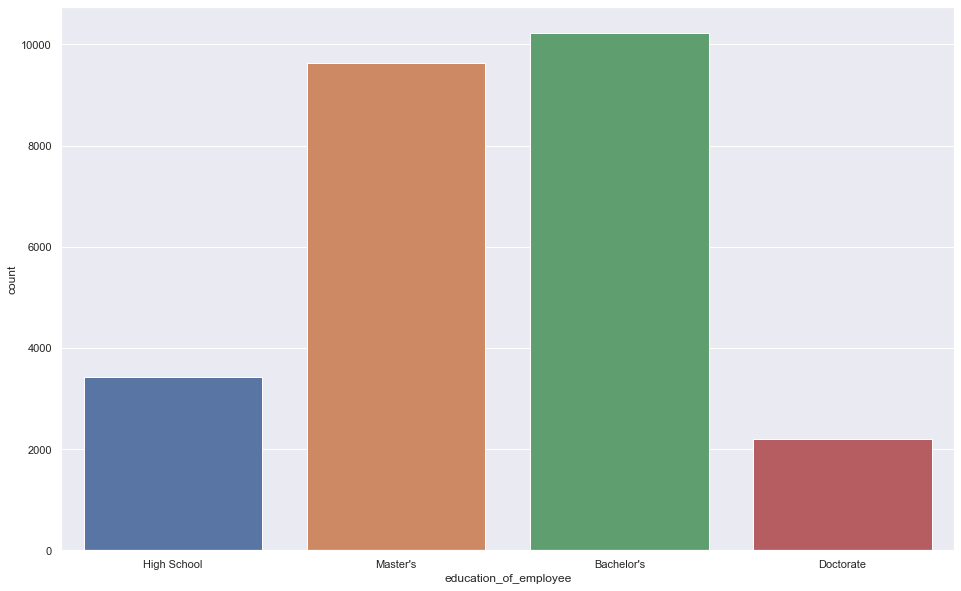

In [33]:
sns.countplot(data=df, x="education_of_employee")

* Most employee acquired Bachelor's, and second most people get Master's.

In [34]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<AxesSubplot:xlabel='region_of_employment', ylabel='count'>

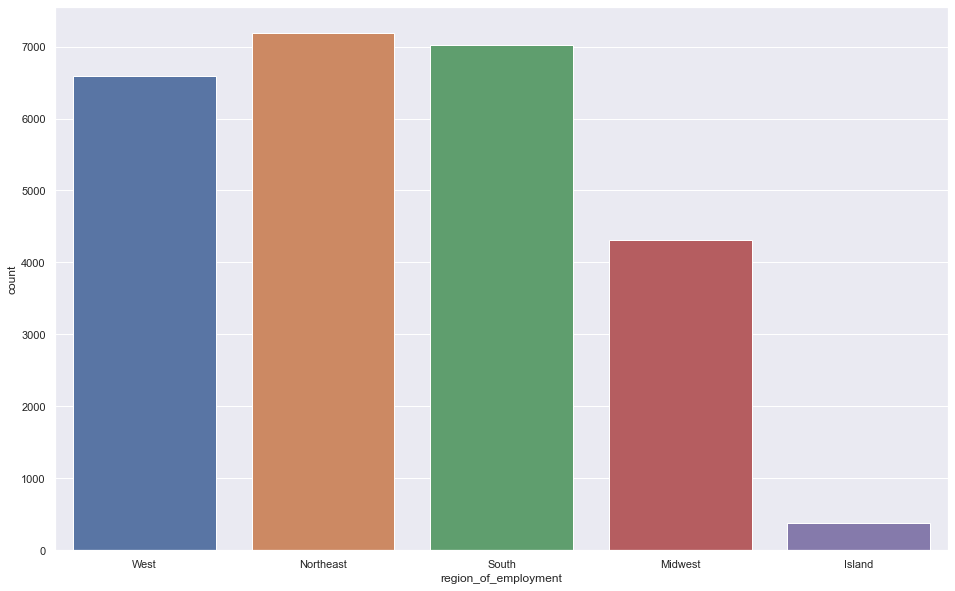

In [35]:
sns.countplot(data=df, x="region_of_employment")

* West, Northeast and South of the USA need more employees who come from the world.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

#### Check Missing value

In [36]:
df.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

#### Feature Engineering

In [37]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


* Using number to replace the values in certain columns.
* For example, in "education_of_employee", we can use different number to represent the High School, Master's etc., using 1 to represent "Y" and 0 to represent "N" in the columns "has_job_experience", "requires_job_training", "full_time_position" and "case_status"(0:Denied, 1:Certified).
* And for the columns "continent", "region_of_employment", "unit_of_wage", I will create dummy variables for them.
* Firstly, let's check how many unique values in the column "education_of_employee".

In [38]:
df["education_of_employee"].unique()

array(['High School', "Master's", "Bachelor's", 'Doctorate'], dtype=object)

* There are four different unique values in the column "education_of_employee", and I will use 1, 2, 3, 4 to represetn the High school, Bachelor's, Master's and Doctorate respectively.

In [39]:
replaceStruct = {
                "education_of_employee":{"High School":1, "Bachelor's":2 ,"Master's":3 ,"Doctorate":4},
                "has_job_experience":{"N": 0, "Y": 1 } ,
                "requires_job_training": {"N": 0, "Y": 1 },
                "full_time_position":{"N": 0, "Y": 1 },
                "case_status":{"Denied": 0, "Certified": 1 },
                    }
Dummyvar=["continent","region_of_employment","unit_of_wage"]

In [40]:
df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=Dummyvar)
df.head(10)


,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,case_status,continent_Africa,continent_Asia,...,continent_South America,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,1,0,0,14513,2007,592.2029,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,3,1,0,2412,2002,83425.6500,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
2,2,0,1,44444,2008,122996.8600,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,2,0,0,98,1897,83434.0300,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,3,1,0,1082,2005,149907.3900,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
5,3,1,0,2339,2012,78252.1400,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
6,2,0,0,4985,1994,53635.3900,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
7,2,1,0,3035,1924,418.2298,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
8,2,0,0,4810,2012,74362.1900,1,1,0,1,...,0,0,1,0,0,0,0,0,0,1
9,4,1,0,2251,1995,67514.7600,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1


* I want to use “age_of_company” to replace the "yr_of_estab", that is: the length of the company's establishment to 2022.
* And then, drop the column "yr_of_estab".

In [41]:
df["age_of_company"]=2022-df["yr_of_estab"]
df.drop(["yr_of_estab"], axis=1, inplace=True)

* Checking Dataset again.

In [42]:
df.head()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,case_status,continent_Africa,continent_Asia,continent_Europe,...,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,age_of_company
0,1,0,0,14513,592.2029,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,15
1,3,1,0,2412,83425.6500,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,20
2,2,0,1,44444,122996.8600,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,14
3,2,0,0,98,83434.0300,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,125
4,3,1,0,1082,149907.3900,1,1,1,0,0,...,0,0,0,1,0,0,0,0,1,17


In [43]:
df.shape

(25480, 23)

* Now, we are all set.

#### Outliers Detect

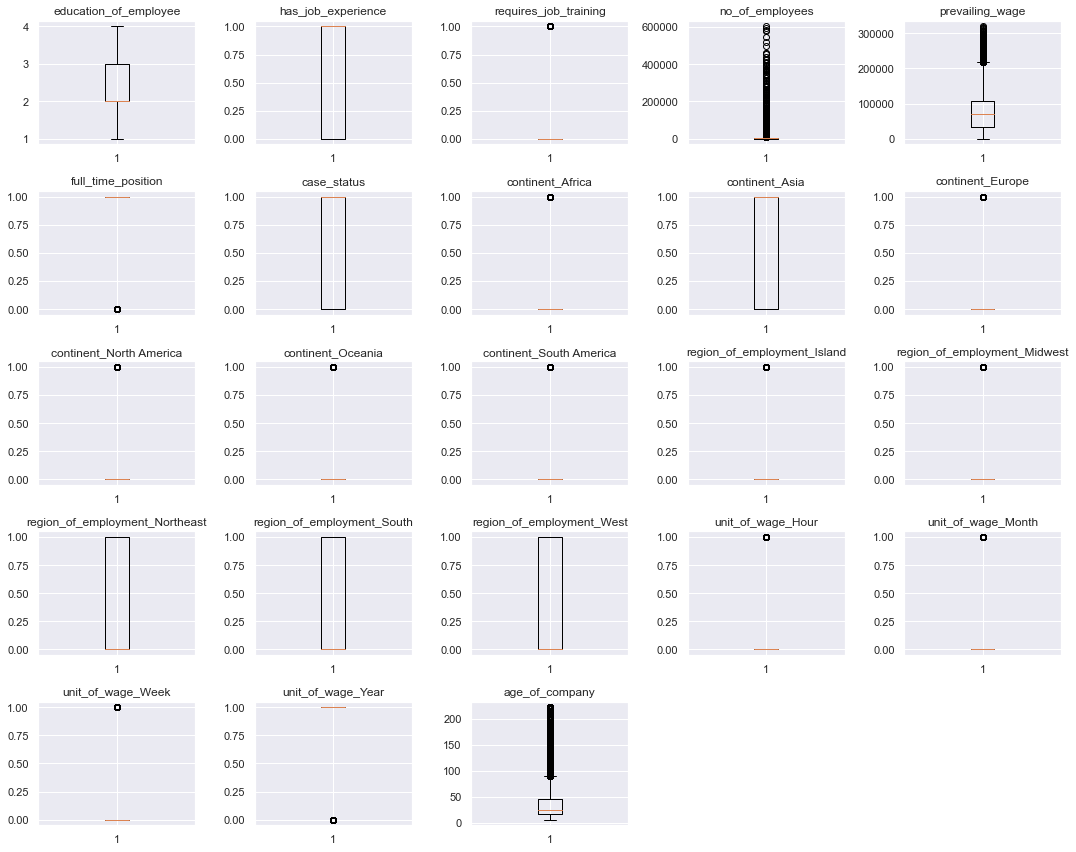

In [44]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 5, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

Observations

*    There are quite a few outliers in the data.
*    However, I won't deal with them as they are from the real world.

#### Preparing data for modeling

- We want to predict which visa will be certified.
- I'll split the data into train and test set.

In [45]:
X = df.drop(["case_status"], axis=1)
Y = df["case_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [46]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 22)
Shape of test set :  (7644, 22)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


* Awesome! Let's make the model now.

### Model evaluation criterion

* Before building the model, we need to identify which value should be maximum.

### The model may make wrong predictions:
* The model predicts that the visa application will be certified, but in reality, the visa application should be rejected.
* The model predicts that visa applications will not be certified, when in fact visa applications should be certified.

### Which mistake is more important:
* Both are important.
* Companies and locals in the U.S. stand to lose by letting unqualified people get approved. Companies could lose money, and local Americans could lose their jobs.
* If a qualified job candidate is denied entry, the company and the candidate will suffer losses. The company may lose future company interests because it cannot have an experienced staff member, and the candidate may also lose opportunity in the future, that the opportunity to work in the United States, resulting in a butterfly effect that changes the trajectory of their life.

### How to reduce the losses?
* F1 Score can be used to be a important criterion, greater the F1 score higher the chance to reduce the wrong.

### Create functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.

In [47]:
def model_performance_classification_sklearn(model, predictors, target):
    
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  
    recall = recall_score(target, pred)  
    precision = precision_score(target, pred)  
    f1 = f1_score(target, pred) 

    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [48]:
def confusion_matrix_sklearn(model, predictors, target):
    
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building bagging and boosting models

## 1.Bagging Models

### 1.1 Decision Tree Model

* In this case, we can pass a dictionary {0:0.33,1:0.67} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [49]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.33,1:0.67},random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, random_state=1)

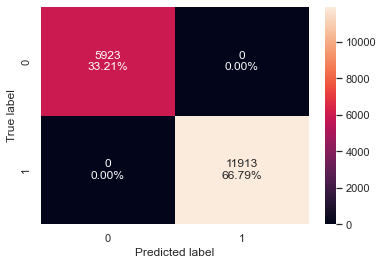

In [50]:
confusion_matrix_sklearn(dtree, X_train, y_train)

In [51]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


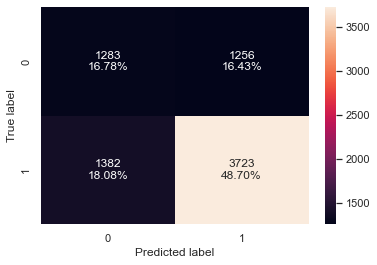

In [52]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [53]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.654893  0.729285   0.747741  0.738397


* Decision tree is working well on the training data but is not able to generalize well on the test data concerning the F1, it's overfit.

### 1.2 Bagging Classifier

In [54]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

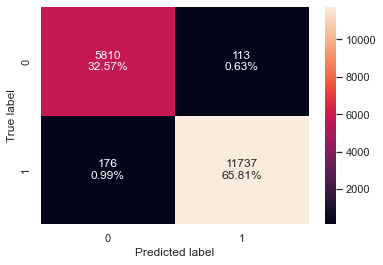

In [55]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [56]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.983797  0.985226   0.990464  0.987838


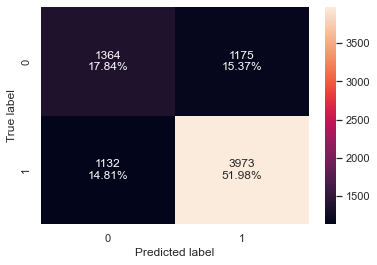

In [57]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [58]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.698195  0.778257   0.771756  0.774993


* Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of F1.

### 1.3 Bagging Classifier with weighted decision tree

In [59]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.33,1:0.67},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.33,
                                                                      1: 0.67},
                                                        random_state=1),
                  random_state=1)

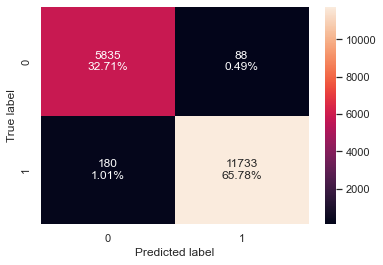

In [60]:
confusion_matrix_sklearn(bagging_wt,X_train,y_train)

In [61]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.984974  0.98489   0.992556  0.988708


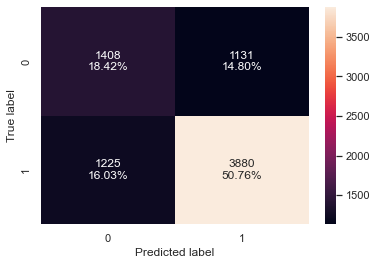

In [62]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [63]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.691784  0.760039   0.774297  0.767102


* Bagging classifier with a weighted decision tree is giving very good accuracy and prediction but is not able to generalize well on test data in terms of F1. Still overfitting, not improve much.

### 1.4 Random Forest

In [64]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

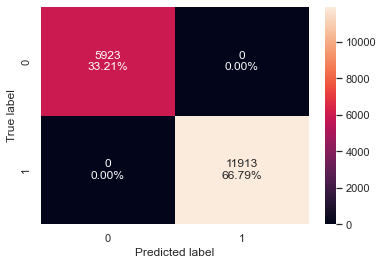

In [65]:
confusion_matrix_sklearn(rf,X_train,y_train)

In [66]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


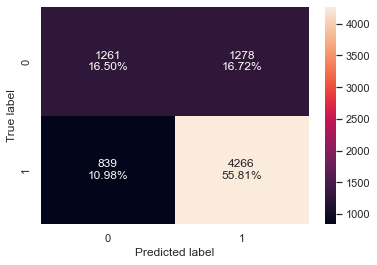

In [67]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [68]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.723051  0.835651   0.769481  0.801202


* Random Forest has performed well in terms of accuracy, precision, Recall and F1, but it is not able to generalize well on the test data in terms of F1, still overfitting, but better than the decission tree and decission tree with weight class.

### 1.5 Random forest with class weights

In [69]:
rf_wt = RandomForestClassifier(class_weight={0:0.33,1:0.67}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.33, 1: 0.67}, random_state=1)

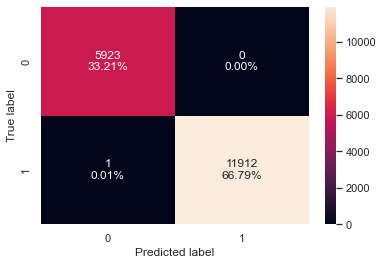

In [70]:
confusion_matrix_sklearn(rf_wt, X_train,y_train)

In [71]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958


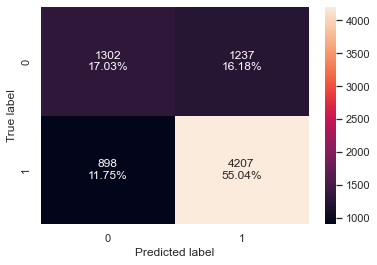

In [72]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [73]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.720696  0.824094   0.772777  0.797611


* There is not much improvement in metrics of weighted random forest as compared to the unweighted random forest.

## 2.Boosting Model

### 2.1 AdaBoost Classifier

In [74]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

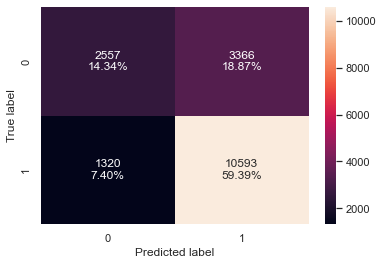

In [75]:
confusion_matrix_sklearn(abc, X_train,y_train)

In [76]:
abc_model_train_perf=model_performance_classification_sklearn(abc, X_train,y_train)
print("Training performance \n",abc_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.737273  0.889197   0.758865  0.818878


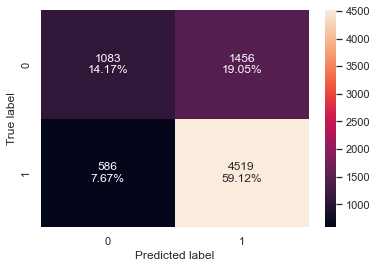

In [77]:
confusion_matrix_sklearn(abc, X_test,y_test)

In [78]:
abc_model_test_perf=model_performance_classification_sklearn(abc, X_test,y_test)
print("Testing performance \n",abc_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.732862  0.885211   0.756318  0.815704


* Adaboosting preformed good on both training and testing set, it's not overfitting, F1 score are good in both training and testing data, but I will still try to improve the F1 score. However, it's not good enough in terms of accuracy in both training and testing dataset.

### 2.2 Gradient Boosting Classifier

In [79]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

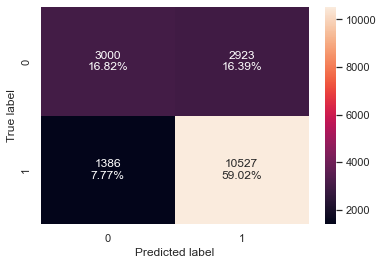

In [80]:
confusion_matrix_sklearn(gbc, X_train,y_train)

In [81]:
gbc_model_train_perf=model_performance_classification_sklearn(gbc, X_train,y_train)
print("Training performance \n",gbc_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.75841  0.883657   0.782677  0.830107


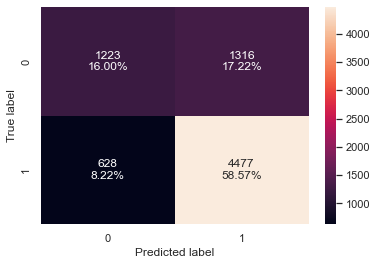

In [82]:
confusion_matrix_sklearn(gbc, X_test,y_test)

In [83]:
gbc_model_test_perf=model_performance_classification_sklearn(gbc, X_test,y_test)
print("Testing performance \n",gbc_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.745683  0.876983   0.772829  0.821619


* Small improvement in F1 score, but accuracy still not good enough in both training and testing dataset.

##  Will tuning the hyperparameters improve the model performance?

* Now, I will try to tune the models that have been done before to improve performance.
* And after tuning the model, I will make the last stacking model by using the tuned estimators.

## 3. Tuning Models

### 3.1 Tuning Decision Tree

In [84]:
 dtree_estimator = DecisionTreeClassifier(class_weight={0:0.33,1:0.67},random_state=1)

parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_tuned = grid_obj.best_estimator_

dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, max_depth=9,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

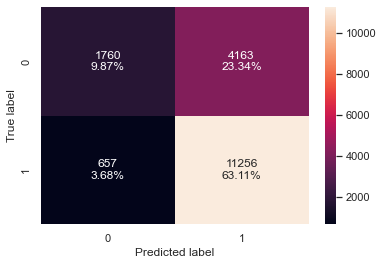

In [85]:
confusion_matrix_sklearn(dtree_tuned, X_train,y_train)

In [86]:
dtree_tuned_model_train_perf=model_performance_classification_sklearn(dtree_tuned, X_train,y_train)
print("Training performance \n",dtree_tuned_model_train_perf)

Training performance 
    Accuracy   Recall  Precision       F1
0   0.72976  0.94485   0.730008  0.82365


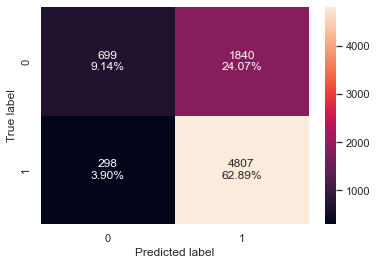

In [87]:
confusion_matrix_sklearn(dtree_tuned, X_test,y_test)

In [88]:
dtree_tuned_model_test_perf=model_performance_classification_sklearn(dtree_tuned, X_test, y_test)
print("Testing performance \n",dtree_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.720304  0.941626   0.723183  0.818074


* Make some improvements here, reduced overfitting, F1 is pretty good, but accuracy is a little bit lower.

### 3.2 Tuning Bagging Classifier

In [89]:
cl1 = DecisionTreeClassifier(class_weight={0:0.33,1:0.67},random_state=1)
param_grid = {'base_estimator':[cl1],
              'max_features': [0.7,0.8,0.9,1],
              'max_samples': [0.7,0.8,0.9,1], 
              'n_estimators' : [10,20,30,40,50],
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'f1', cv = 5)
grid.fit(X_train, y_train)

bagging_tuned  = grid.best_estimator_
bagging_tuned.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.33,
                                                                      1: 0.67},
                                                        random_state=1),
                  max_features=0.7, max_samples=0.9, n_estimators=50,
                  random_state=1)

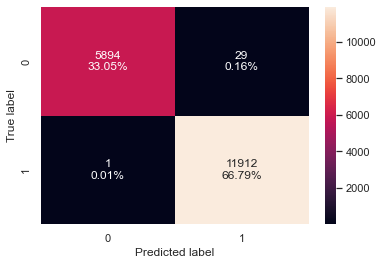

In [90]:
confusion_matrix_sklearn(bagging_tuned, X_train,y_train)

In [91]:
bagging_tuned_model_train_perf=model_performance_classification_sklearn(bagging_tuned, X_train,y_train)
print("Training performance \n",bagging_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.998318  0.999916   0.997571  0.998742


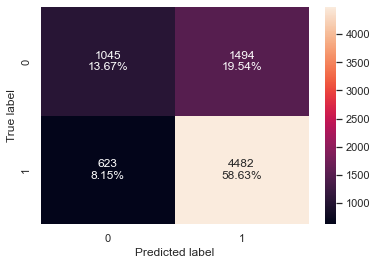

In [92]:
confusion_matrix_sklearn(bagging_tuned, X_test,y_test)

In [93]:
bagging_tuned_model_test_perf=model_performance_classification_sklearn(bagging_tuned, X_test, y_test)
print("Testing performance \n",bagging_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.723051  0.877963       0.75  0.808952


* Although F1 and accuracy in testing data has increased, it's still overfitting on training data.

### 3.3 Tuning Random Forest

In [94]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(5, 10),
        "max_features": [0.2, 0.7, 0.1],
        "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='f1',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.2, max_samples=0.6000000000000001,
                       min_samples_leaf=8, n_estimators=251, random_state=1)

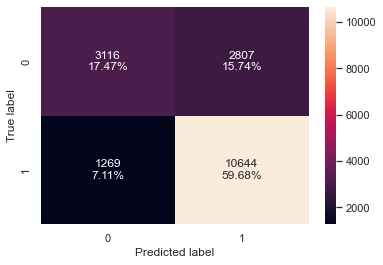

In [95]:
confusion_matrix_sklearn(rf_tuned, X_train,y_train)

In [96]:
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned, X_train,y_train)
print("Training performance \n",rf_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision      F1
0  0.771473  0.893478   0.791317  0.8393


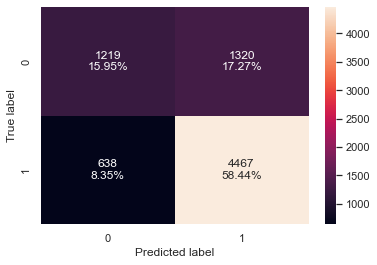

In [97]:
confusion_matrix_sklearn(rf_tuned, X_test,y_test)

In [98]:
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned, X_test, y_test)
print("Testing performance \n",rf_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.743851  0.875024   0.771903  0.820235


* Both F1 and Accuracy increased, which is good news for us, and the model is not overfitting.

### 3.4 Tuning AdaBoosting Classifier

In [99]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
              'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=30, random_state=1)

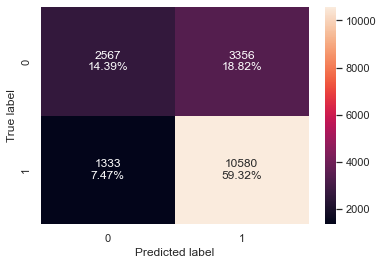

In [100]:
confusion_matrix_sklearn(abc_tuned, X_train,y_train)

In [101]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned, X_train,y_train)
print("Training performance \n",abc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision      F1
0  0.737105  0.888105   0.759185  0.8186


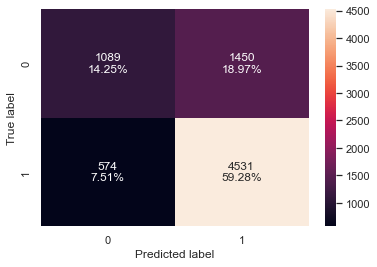

In [102]:
confusion_matrix_sklearn(abc_tuned, X_test,y_test)

In [103]:
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned, X_test, y_test)
print("Testing performance \n",abc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.735217  0.887561   0.757566  0.817427


* The new model doesn't make much progress compared to the previous model that hasn't been tweaked

### 3.5 Tuning Gradient Boosting Classifier

In [104]:
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(gbc_tuned, parameters, scoring='f1',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

gbc_tuned = grid_obj.best_estimator_

gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=200, random_state=1,
                           subsample=1)

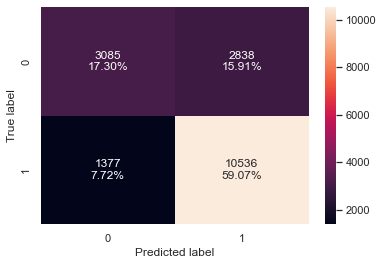

In [105]:
confusion_matrix_sklearn(gbc_tuned, X_train,y_train)

In [106]:
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned, X_train,y_train)
print("Training performance \n",gbc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.76368  0.884412   0.787797  0.833314


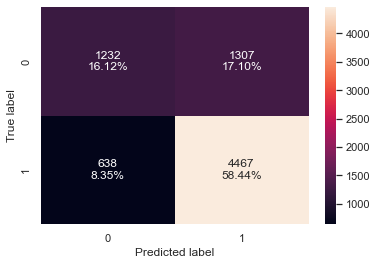

In [107]:
confusion_matrix_sklearn(gbc_tuned, X_test,y_test)

In [108]:
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
print("Testing performance \n",gbc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.745552  0.875024    0.77364  0.821215


* Doesn't make much improvement, but not overfitting. 

### 3.6 Stacking Model

In [109]:
estimators=[('Random Forest', rf_tuned),('Decision Tree', dtree_tuned),
           ('Gradient Boosting', gbc_tuned),('AdaBoosting', abc_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [110]:
stacking_model=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_model.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Random Forest',
                                RandomForestClassifier(max_features=0.2,
                                                       max_samples=0.6000000000000001,
                                                       min_samples_leaf=8,
                                                       n_estimators=251,
                                                       random_state=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.33,
                                                                     1: 0.67},
                                                       max_depth=9,
                                                       max_leaf_nodes=15,
                                                       min_impurity_decrease=0.0001,
                                                       random_state=1)),
                               ('Gradie

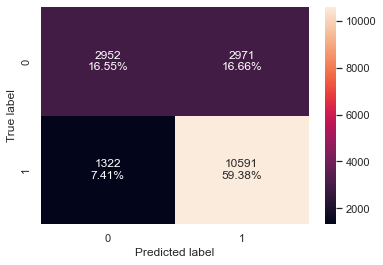

In [111]:
confusion_matrix_sklearn(stacking_model, X_train,y_train)

In [112]:
stacking_model_train_perf=model_performance_classification_sklearn(stacking_model, X_train,y_train)
print("Training performance \n",stacking_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.759307  0.889029   0.780932  0.831482


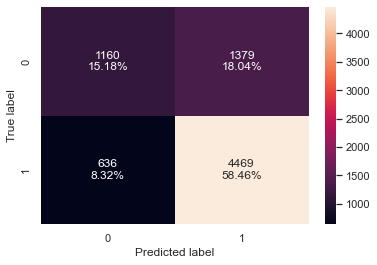

In [113]:
confusion_matrix_sklearn(stacking_model, X_test,y_test)

In [114]:
stacking_model_test_perf=model_performance_classification_sklearn(stacking_model, X_test, y_test)
print("Testing performance \n",stacking_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.736395  0.875416   0.764193  0.816032


* Not overfitting on the training data, but didn't get much improvement on F1 and Accuracy.

## Model Performance Comparison and Conclusions

In [115]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
dtree_model_train_perf.T,
bagging_model_train_perf.T,
bagging_wt_model_train_perf.T,
rf_model_train_perf.T,
rf_wt_model_train_perf.T,
abc_model_train_perf.T,
gbc_model_train_perf.T,
dtree_tuned_model_train_perf.T,
bagging_tuned_model_train_perf.T,
rf_tuned_model_train_perf.T,
abc_tuned_model_train_perf.T,
gbc_tuned_model_train_perf.T,
stacking_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without weight class",
    "Bagging model without tweak",
    "Bagging model with weight class",
    "Random Forest without weight class",
    "Random Forest with weight class",
    "AdaBoosting without tweak",
    "Gradient Boosting without tweak",
    "Decision Tree tuned",
    "Bagging tuned",
    "Random Forest tuned",
    "AdaBoosting with tuned",
    "Gradient Boosting with tuned",
    "Stacking Model",
]

In [116]:
# test performance comparison
models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        bagging_model_test_perf.T,
        bagging_wt_model_test_perf.T,
        rf_model_test_perf.T,
        rf_wt_model_test_perf.T,
        abc_model_test_perf.T,
        gbc_model_test_perf.T,
        dtree_tuned_model_test_perf.T,
        bagging_tuned_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        stacking_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without weight class",
    "Bagging model without tweak",
    "Bagging model with weight class",
    "Random Forest without weight class",
    "Random Forest with weight class",
    "AdaBoosting without tweak",
    "Gradient Boosting without tweak",
    "Decision Tree tuned",
    "Bagging tuned",
    "Random Forest tuned",
    "AdaBoosting with tuned",
    "Gradient Boosting with tuned",
    "Stacking Model",
]

In [117]:
models_train_comp_df

,Decision Tree without weight class,Bagging model without tweak,Bagging model with weight class,Random Forest without weight class,Random Forest with weight class,AdaBoosting without tweak,Gradient Boosting without tweak,Decision Tree tuned,Bagging tuned,Random Forest tuned,AdaBoosting with tuned,Gradient Boosting with tuned,Stacking Model
Accuracy,1.0,0.983797,0.984974,1.0,0.999944,0.737273,0.758410,0.729760,0.998318,0.771473,0.737105,0.763680,0.759307
Recall,1.0,0.985226,0.984890,1.0,0.999916,0.889197,0.883657,0.944850,0.999916,0.893478,0.888105,0.884412,0.889029
Precision,1.0,0.990464,0.992556,1.0,1.000000,0.758865,0.782677,0.730008,0.997571,0.791317,0.759185,0.787797,0.780932
F1,1.0,0.987838,0.988708,1.0,0.999958,0.818878,0.830107,0.823650,0.998742,0.839300,0.818600,0.833314,0.831482


In [118]:
models_test_comp_df

,Decision Tree without weight class,Bagging model without tweak,Bagging model with weight class,Random Forest without weight class,Random Forest with weight class,AdaBoosting without tweak,Gradient Boosting without tweak,Decision Tree tuned,Bagging tuned,Random Forest tuned,AdaBoosting with tuned,Gradient Boosting with tuned,Stacking Model
Accuracy,0.654893,0.698195,0.691784,0.723051,0.720696,0.732862,0.745683,0.720304,0.723051,0.743851,0.735217,0.745552,0.736395
Recall,0.729285,0.778257,0.760039,0.835651,0.824094,0.885211,0.876983,0.941626,0.877963,0.875024,0.887561,0.875024,0.875416
Precision,0.747741,0.771756,0.774297,0.769481,0.772777,0.756318,0.772829,0.723183,0.750000,0.771903,0.757566,0.773640,0.764193
F1,0.738397,0.774993,0.767102,0.801202,0.797611,0.815704,0.821619,0.818074,0.808952,0.820235,0.817427,0.821215,0.816032


* From above table, we can notice that apart from those overfitting models, the difference between the other models is not big, but here I will choose Gradient Boosting with tuned as the final model, because in this model the F1 score and accuracy are slightly higher than other models.

### Let's check the importance of each feature in the Gradient Boosting with tuned model.

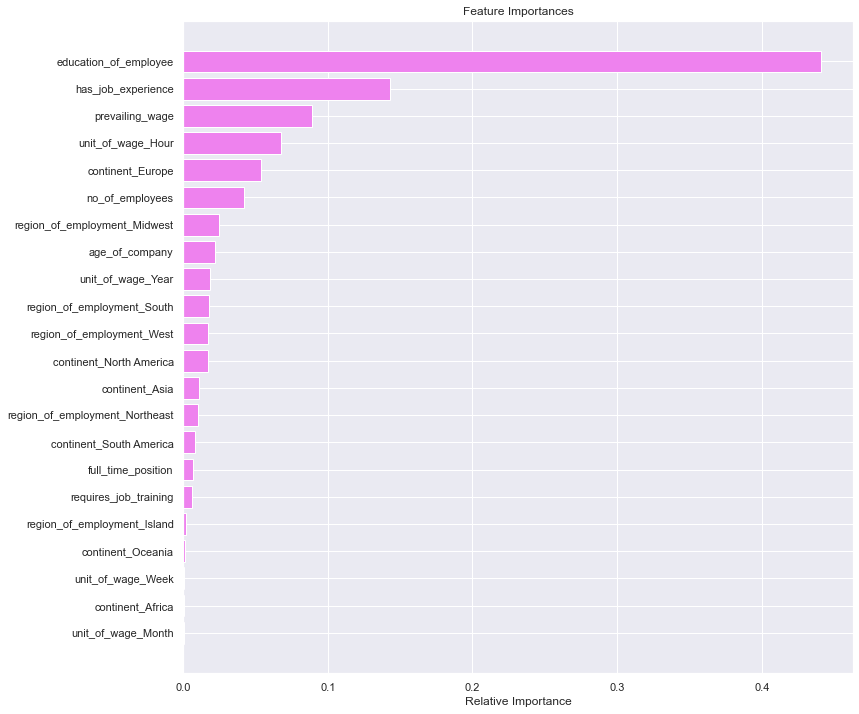

In [119]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Actionable Insights and Recommendations

* U.S. Customs can use this model to predict whether a candidate's visa should be granted or denied.
* We can note that education of employee and work experience play a decisive role in whether an applicant can obtain a visa. This makes sense logically. Candidates with higher education and work experience are more qualified for jobs in the United States, and they are more likely to get visas to work in the United States.
* I suggested that the government can set corresponding policies and rules in the introduction of talents, such as: setting educational requirements, only foreigners with a bachelor's degree or above can apply for work in the United States, and only foreign workers with 5 years of work experience are allowed to apply for visas.
* The data in the original data, such as "the year the company was established", does not seem to have a significant impact on the prediction model. In the future data collection process, it is more logical to collect more data related to whether the applicant is qualified, such as : The QS ranking of the applicant's school, the applicant's GPA score, etc.